In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv('myexcel .csv')
data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [8]:
if "Height" in data.columns: # Replace the height column with random values between 150 and 180
    data["Height"] = np.random.randint(150, 181, size=len(data))
data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,150,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,178,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,151,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,170,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,174,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,160,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,170,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,162,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,176,231,Kansas,947276.0


In [10]:
data.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,150,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,178,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,151,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,170,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,174,231,NaN,5000000.0


In [14]:
team_distribution=data["Team"].value_counts()#findng  employee count distribution of each team
team_percentage=(team_distribution/len(data))*100 #finding percentage of team distribution
team_stats=pd.DataFrame({"Employee_count":team_distribution,"Percentage":team_percentage.round(2)}) #printing a dataframe of percentage and count  
team_stats.

Index(['New Orleans Pelicans', 'Memphis Grizzlies', 'Utah Jazz',
       'New York Knicks', 'Milwaukee Bucks', 'Brooklyn Nets',
       'Portland Trail Blazers', 'Oklahoma City Thunder', 'Denver Nuggets',
       'Washington Wizards', 'Miami Heat', 'Charlotte Hornets',
       'Atlanta Hawks', 'San Antonio Spurs', 'Houston Rockets',
       'Boston Celtics', 'Indiana Pacers', 'Detroit Pistons',
       'Cleveland Cavaliers', 'Chicago Bulls', 'Sacramento Kings',
       'Phoenix Suns', 'Los Angeles Lakers', 'Los Angeles Clippers',
       'Golden State Warriors', 'Toronto Raptors', 'Philadelphia 76ers',
       'Dallas Mavericks', 'Orlando Magic', 'Minnesota Timberwolves'],
      dtype='object', name='Team')

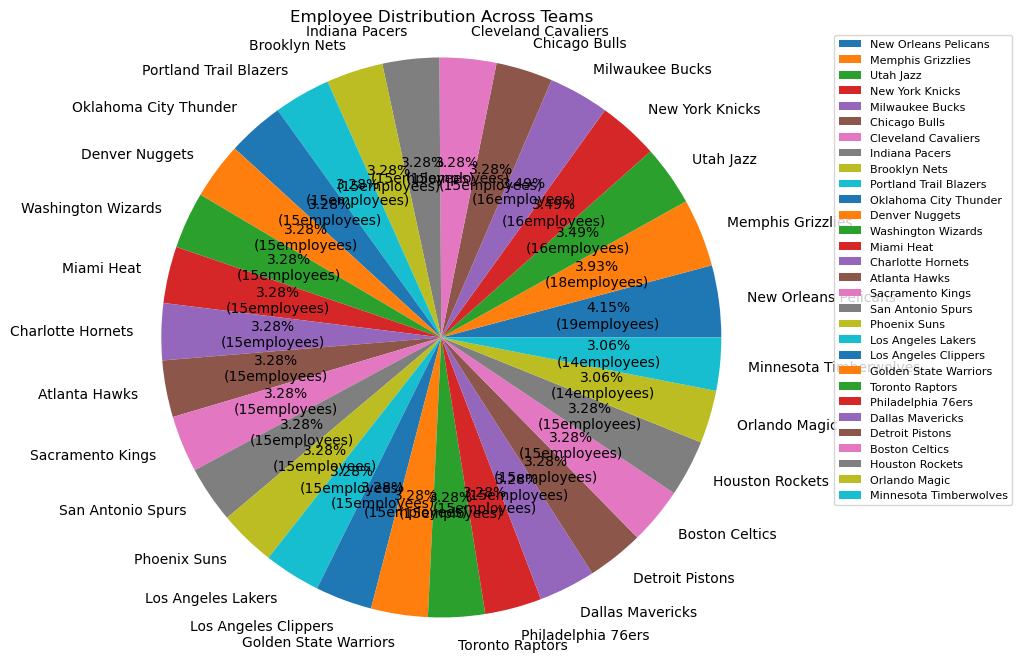

In [94]:
plt.figure(figsize=(10,8))
plt.pie(team_stats['Employee_count'],
        labels=team_stats.index,
        autopct=lambda  pct: f'{pct:.2f}%\n({int(round(pct * sum(team_stats["Employee_count"])/100))}employees)',
       )
startangle=140
textprops={'fontsize':9}
plt.title('Employee Distribution Across Teams')
plt.axis('Equal')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),fontsize=8)
plt.show()

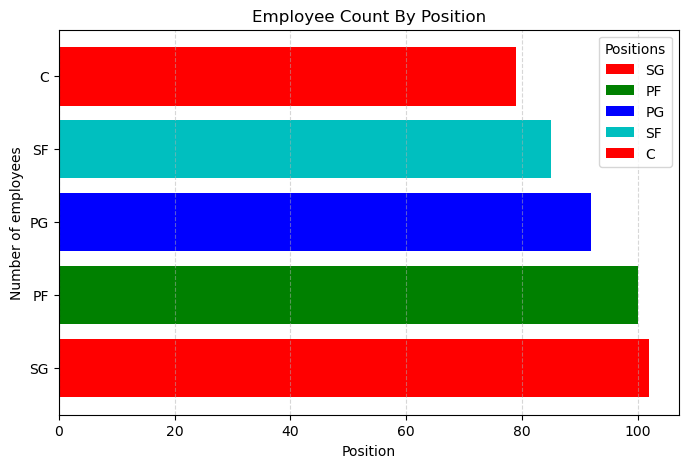

In [96]:
# draw a horizontal bar chart of employee count by position
pos_count=data['Position'].value_counts()
pos=pos_count.index
count=pos_count.values
plt.figure(figsize=(8,5),dpi=100)
plt.xlabel("Position")
plt.ylabel("Number of employees")
plt.title("Employee Count By Position")
colors=['r','g','b','c']
plt.barh(pos,count,color=colors,label=pos )
plt.legend(title="Positions") 
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

Text(0.5, 1.0, 'Salary Distribution By Position')

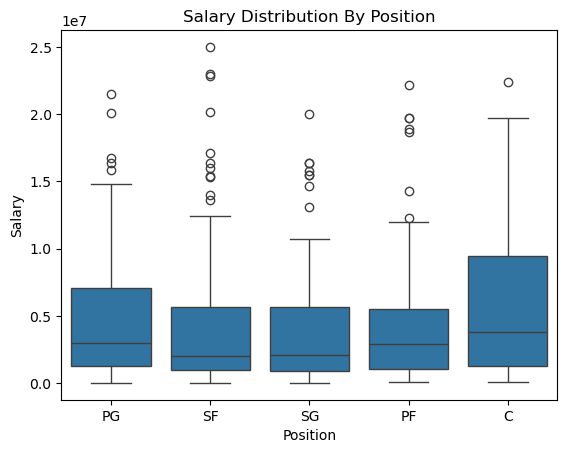

In [283]:
#box plot salary distribution by position
sns.boxplot(x='Position', y='Salary', data=data)
plt.title("Salary Distribution By Position")

Predominant Age Group: 25-29


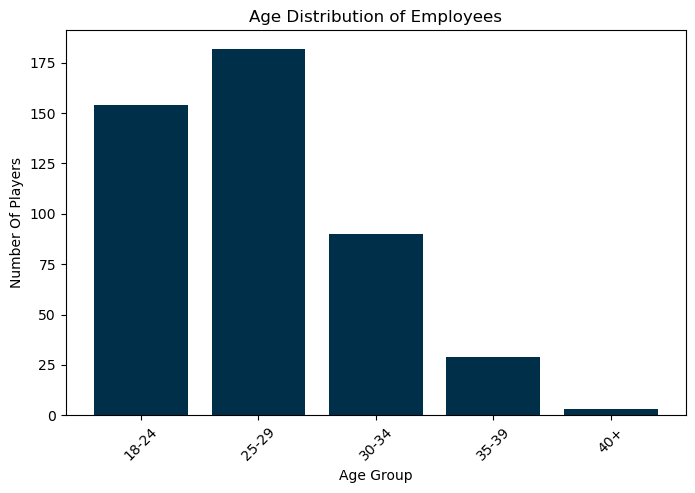

In [270]:
#visualisation of predominant age group among employees
bins=[18,25,30,35,40,100]
labels=['18-24','25-29','30-34','35-39','40+']
data["Age Group"] = pd.cut(
    data['Age'],
    bins=bins,
    labels=labels,
    right=False
)
age_grp=data['Age Group'].value_counts().sort_index()
age_values=age_grp.values
age_count=age_grp.index

print("Predominant Age Group:", age_grp.idxmax())
plt.figure(figsize=(8,5),dpi=100)
plt.bar(age_count,age_values,color="#003049")
plt.xticks( rotation=45)
plt.xlabel("Age Group")
plt.ylabel("Number Of Players")
plt.title("Age Distribution of Employees")
plt.show()

In [351]:
# finding highest paid team and salary
team_salary=data.groupby('Team')['Salary'].sum()
highest_salary=team_salary.max()
highest_paid_team=team_salary.idxmax()
print(f"The highest paying team is '{highest_paid_team}' with salary expenditure of {highest_salary},")

The highest paying team is 'Cleveland Cavaliers' with salary expenditure of 106988689.0,


In [353]:
#finding highest paid position and salary
pos_salary=data.groupby('Position')['Salary'].sum()
highest_salary=pos_salary.max()
highest_pos_salary=pos_salary.idxmax()
print(f"The highest paying position is '{highest_pos_salary}' with salary expenditure of {highest_salary},")

The highest paying position is 'C' with salary expenditure of 466377332.0,


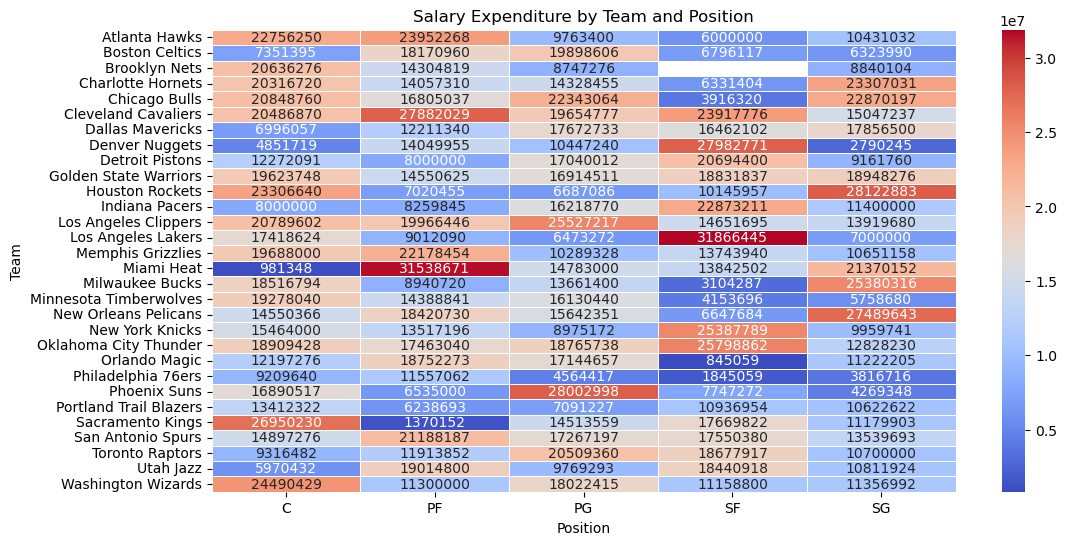

In [361]:
#salary expenditure by heatmap
team_position_salary = data.groupby(['Team', 'Position'])['Salary'].sum().reset_index()
salary_pivot = team_position_salary.pivot(index="Team", columns="Position", values="Salary")
plt.figure(figsize=(12, 6))
sns.heatmap(salary_pivot, annot=True, cmap="coolwarm", fmt=".0f", linewidths=0.5)
plt.title("Salary Expenditure by Team and Position")
plt.xlabel("Position")
plt.ylabel("Team")
plt.show()

In [369]:
#finding correlation between age and salary
correlation=data['Age'].corr(data['Salary'])
print(f"Correlation between Age and Salary:{correlation}")


Correlation between Age and Salary:0.21400941226570971


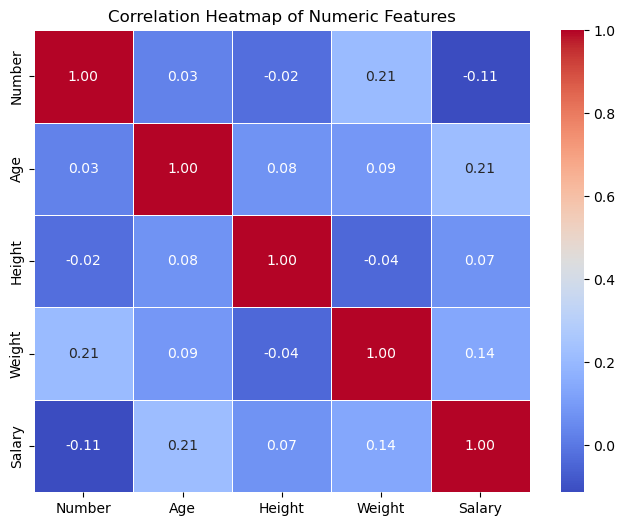

In [100]:
#correalation visual of heatmap of numneric 
numeric_data= data.select_dtypes(include=['number'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f",linewidth=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

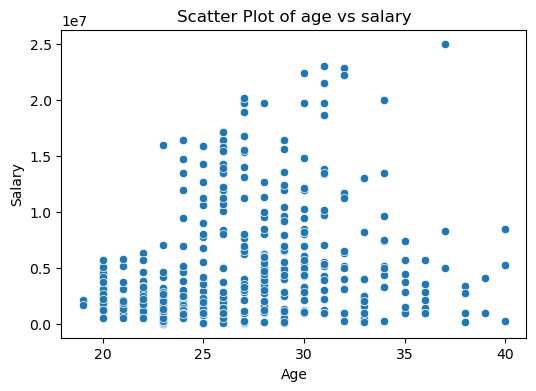

In [383]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Age'], y=data['Salary'])
plt.title("Scatter Plot of age vs salary")
plt.show()

                                                        Data Story(Insights Key Trends From Analysis)
1. Employee Distribution Across Teams

Dominant Teams: Teams like the Boston Celtics, Brooklyn Nets, and Golden State Warriors have the highest number of employees (players

Key Patterns and Takeaways
-
Team Strategy: Larger-market teams invest in star-heavy rosters, while smaller markets focus on youth development.-

Positional Value: Guards dominate rosters, but centers command higher salaries due to scarcity-.

Age Dynamics: Teams balance young talent (cost-effective) with prime-age players (immediate impac-t).

Salary Allocation: ~70% of salary expenditure goes to players aged 25–34, aligning with performance peaks.

Actionable Recommendations
-Rebuilding Teams: Target cost-effective younger players (20–24) for long-term growth.

-Contenders: Invest in prime-age (25–29) stars for immediate championship contention.

-Avoid Overpaying Veterans: Limit long-term contracts for players >30 unless they are franchise cornerstones.